<a href="https://colab.research.google.com/github/jishaalbert/Data-Science-projects/blob/main/Online_Payment_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# 2. Loading the Data

In [ ]:
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
# 3. Initial Data Inspection

In [ ]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB
None


In [ ]:
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  69858.000000  6.985800e+04   6.985800e+04    6.985800e+04   
mean       7.893326  1.640176e+05   9.043066e+05    9.202980e+05   
std        1.874512  3.313730e+05   2.791616e+06    2.829881e+06   
min        1.000000  6.300000e-01   0.000000e+00    0.000000e+00   
25%        8.000000  9.011012e+03   0.000000e+00    0.000000e+00   
50%        8.000000  4.404918e+04   1.990850e+04    0.000000e+00   
75%        9.000000  1.991307e+05   1.721175e+05    1.940205e+05   
max        9.000000  1.000000e+07   3.379739e+07    3.400874e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.985800e+04    6.985700e+04  69857.000000         69857.0  
mean     8.543522e+05    1.185141e+06      0.001532             0.0  
std      2.403000e+06    2.871791e+06      0.039107             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

In [ ]:
# 4. Categorical and Numerical Variable Identification

In [ ]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical variables:", len(object_cols), object_cols)

Categorical variables: 3 ['type', 'nameOrig', 'nameDest']


In [ ]:
int_cols = data.select_dtypes(include=['int64']).columns.tolist()
print("Integer variables:", len(int_cols), int_cols)

Integer variables: 1 ['step']


In [ ]:
float_cols = data.select_dtypes(include=['float64']).columns.tolist()
print("Float variables:", len(float_cols), float_cols)

Float variables: 7 ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
# 5. Data Visualization

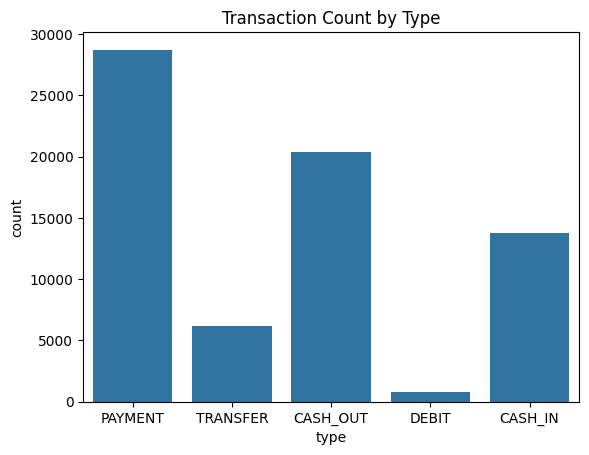

In [ ]:
sns.countplot(x='type', data=data)
plt.title('Transaction Count by Type')
plt.show()

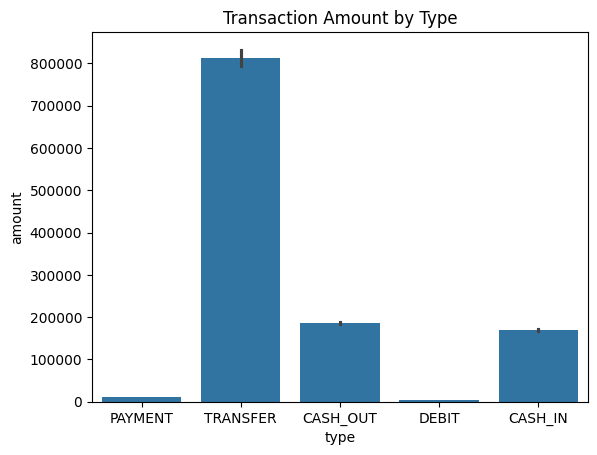

In [ ]:
sns.barplot(x='type', y='amount', data=data)
plt.title('Transaction Amount by Type')
plt.show()

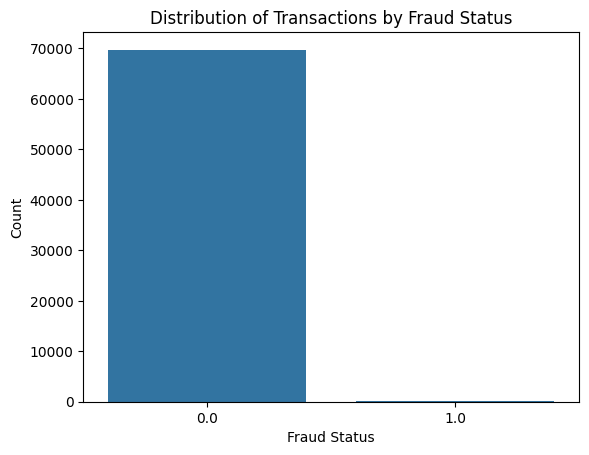

In [ ]:
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Transactions by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

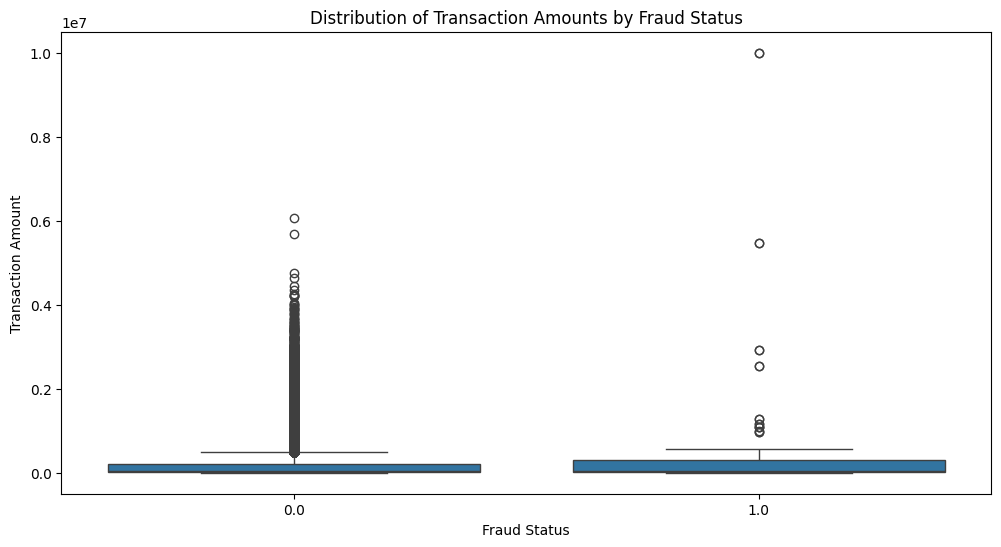

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
#Data Cleaning and Preparation

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
for column in data.select_dtypes(include=[np.number]).columns:data[column].fillna(data[column].mean(), inplace=True)

In [ ]:
for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
#7.Removing Duplicates

In [ ]:
data.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.000000e+00,0.000000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.000000e+00,0.000000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.000000e+00,1.000000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.000000e+00,1.000000,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.000000e+00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69853,9,PAYMENT,30681.62,C849962043,0.0,0.00,M64549705,0.0,0.000000e+00,0.000000,0.0
69854,9,PAYMENT,2866.47,C258151288,0.0,0.00,M1910014593,0.0,0.000000e+00,0.000000,0.0
69855,9,PAYMENT,2926.88,C145336381,0.0,0.00,M1278169306,0.0,0.000000e+00,0.000000,0.0
69856,9,PAYMENT,3704.30,C1539334900,0.0,0.00,M1849245575,0.0,0.000000e+00,0.000000,0.0


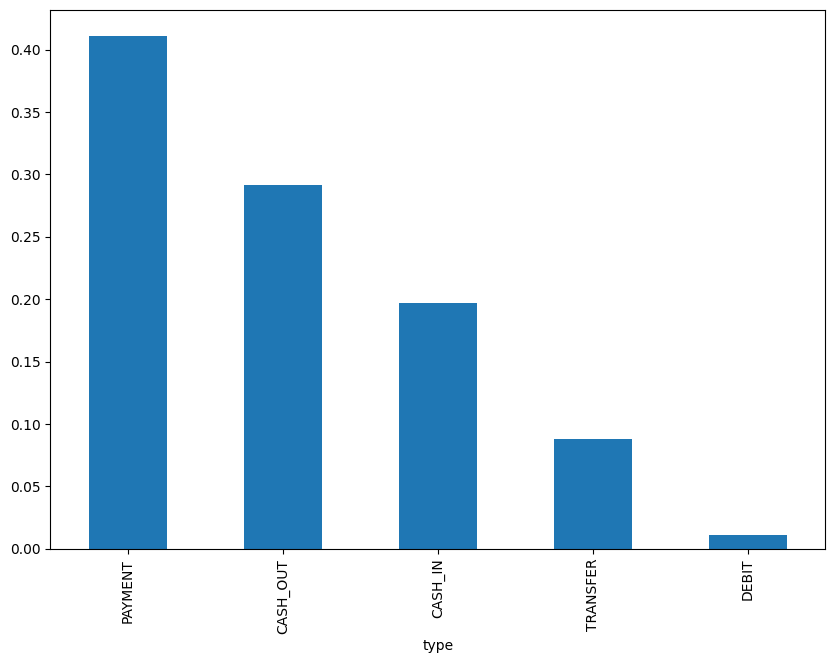

In [ ]:
fig = plt.figure(figsize =(10, 7))
data['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
print("No Frauds Percentage:",data['isFraud'].value_counts()[0]/len(data['isFraud'])*100)
print("Frauds Percentage:",data['isFraud'].value_counts()[1]/len(data['isFraud'])*100)

No Frauds Percentage: 99.84540066993043
Frauds Percentage: 0.15316785479114775


In [ ]:
data.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1, inplace = True)

In [ ]:
#8. Correlation Analysis

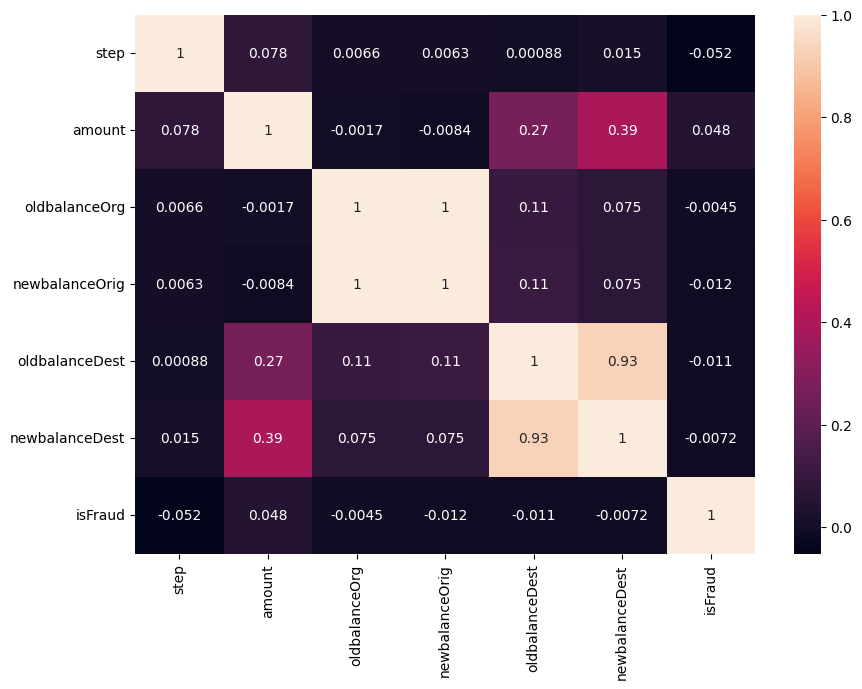

In [ ]:
correlationdata = data.copy()
correlationdata.drop(['type'], axis = 1, inplace = True)

fig = plt.figure(figsize =(10, 7))
sns.heatmap(correlationdata.corr(), annot = True)
plt.show()

In [ ]:
#9.Encoding Categorical Variables

In [ ]:
dataf = pd.get_dummies(data, columns=['type'], drop_first=True)
dataf.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1.0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,False,False,True,False


In [ ]:
#10. Scaling Data

In [ ]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
scaled_data = rscaler.fit_transform(dataf)
data_sc = pd.DataFrame(scaled_data, columns=dataf.columns)

data_sc.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-7.0,-0.179937,0.872819,0.826182,-0.027305,-0.021531,0.0,0.0,0.0,1.0,0.0
1,-7.0,-0.221886,0.007788,0.099911,-0.027305,-0.021531,0.0,0.0,0.0,1.0,0.0
2,-7.0,-0.230740,-0.114616,0.000000,-0.027305,-0.021531,1.0,0.0,0.0,0.0,1.0
3,-7.0,-0.230740,-0.114616,0.000000,0.013539,-0.021531,1.0,1.0,0.0,0.0,0.0
4,-7.0,-0.170319,0.125760,0.154035,-0.027305,-0.021531,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 11. Balancing Data

In [ ]:
nonfraud = dataf[dataf['isFraud'] == 0]
fraud = dataf[dataf['isFraud'] == 1]
nonfraud = nonfraud.sample(n=8300, random_state=1)

frauddata = pd.concat([fraud, nonfraud])
x = frauddata.drop('isFraud', axis = 1)
y = frauddata['isFraud']

In [ ]:
# 12. Handling Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(frauddata.drop('isFraud', axis=1), frauddata['isFraud'])

In [ ]:
# 13. Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.3, random_state=42)

In [ ]:
# 14. Model Training and Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'n_estimators': 200}


In [ ]:
# 15. Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, x_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))

Cross-Validation Scores:  [0.99487952 0.99518072 0.99728916 0.99427711 0.99759036]
Mean CV Score:  0.995843373493976


In [ ]:
# 16. Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [ ]:
# Evaluation Reports

In [ ]:
print("Logistic Regression classification report: \n\n", classification_report(y_test, y_pred_logreg))

Logistic Regression classification report: 

               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      5848
         1.0       0.92      0.96      0.94      5772

    accuracy                           0.94     11620
   macro avg       0.94      0.94      0.94     11620
weighted avg       0.94      0.94      0.94     11620



In [ ]:
print("Decision Tree classification report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree classification report: 

               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      5848
         1.0       0.98      0.99      0.99      5772

    accuracy                           0.99     11620
   macro avg       0.99      0.99      0.99     11620
weighted avg       0.99      0.99      0.99     11620



In [ ]:
print("Random Forest classification report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5848
         1.0       0.99      1.00      0.99      5772

    accuracy                           0.99     11620
   macro avg       0.99      0.99      0.99     11620
weighted avg       0.99      0.99      0.99     11620



In [ ]:
print("Gradient Boosting classification report: \n\n", classification_report(y_test, y_pred_gb))

Gradient Boosting classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5848
         1.0       0.98      1.00      0.99      5772

    accuracy                           0.99     11620
   macro avg       0.99      0.99      0.99     11620
weighted avg       0.99      0.99      0.99     11620



In [ ]:
print("SVM classification report: \n\n", classification_report(y_test, y_pred_svm))

SVM classification report: 

               precision    recall  f1-score   support

         0.0       0.91      0.48      0.63      5848
         1.0       0.64      0.95      0.77      5772

    accuracy                           0.71     11620
   macro avg       0.78      0.72      0.70     11620
weighted avg       0.78      0.71      0.70     11620



In [ ]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Random Forest accuracy score:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting accuracy score:", accuracy_score(y_test, y_pred_gb))
print("SVM Model Accuracy Score:", accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy Score: 0.940275387263339
Decision Tree Accuracy Score: 0.9879518072289156
Random Forest accuracy score: 0.9924268502581756
Gradient Boosting accuracy score: 0.9900172117039587
SVM Model Accuracy Score: 0.7135111876075731


In [ ]:
# ROC-AUC Score for Random Forest

In [ ]:
y_pred_proba_rf = best_rf.predict_proba(x_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("Random Forest ROC-AUC Score: ", roc_auc_rf)

Random Forest ROC-AUC Score:  0.9997844889902003
